## Setup

### imports

In [1]:
import plotly.graph_objects as go
from statsmodels.tsa.seasonal import seasonal_decompose
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sns.set_style('darkgrid')

### definitions

In [3]:
path_data_dir = '../data/'

In [4]:
list_assets = ["PETR3.SA","PRIO3.SA", "VALE3.SA", "GGBR3.SA", "ABCB4.SA", "ITUB3.SA", "FLRY3.SA", "RADL3.SA"]

In [5]:
relevant_cols = ['Date', 'Close', 'Volume']

## Data 

In [6]:
dict_dfs = {}
for asset in list_assets:

    df = pd.read_csv(path_data_dir + f"processed/price_history_{asset.replace('.', '_')}_meta_dataset_ffill.csv", index_col= 0)
    
    dict_dfs.update({asset:df})

In [7]:
dict_dfs

{'PETR3.SA':                 Close      Volume     SMA_21   MSTD_21  Day_of_week  Weekend  \
 Date                                                                           
 2010-12-22  28.490000   3146900.0  28.108095  0.450062            2        0   
 2010-12-23  28.540001   2006300.0  28.139524  0.456338            3        0   
 2010-12-24  28.540001   2006300.0  28.139524  0.456338            4        0   
 2010-12-25  28.540001   2006300.0  28.139524  0.456338            5        1   
 2010-12-26  28.540001   2006300.0  28.139524  0.456338            6        1   
 ...               ...         ...        ...       ...          ...      ...   
 2024-02-25  43.619999  13303800.0  42.770000  1.167981            6        1   
 2024-02-26  44.080002   6699800.0  43.000476  0.878160            0        0   
 2024-02-27  43.970001   8188500.0  43.139048  0.780852            1        0   
 2024-02-28  41.599998  17368700.0  43.121905  0.811385            2        0   
 2024-02-29  41.

In [8]:
def create_joint_df(dict_dfs, col):
    
    df_final = pd.DataFrame({})

    for asset, df in dict_dfs.items():
            
        df_rel = df[col].reset_index()
        
        df_rel.rename({col: asset},axis= 1, inplace = True)
        
        
        if len(df_final) == 0:
            
            df_final = df_rel
        else:
        
            df_final = df_final.merge(
                df_rel,
                on = 'Date',
                how = 'left'
            )
            
    return df_final    

In [9]:
df_dp = create_joint_df(dict_dfs, 'diff_close_mean_z_score')

df_dp.Date = pd.to_datetime(df_dp.Date)
df_dp.set_index("Date", inplace=True)
df_dp

,PETR3.SA,PRIO3.SA,VALE3.SA,GGBR3.SA,ABCB4.SA,ITUB3.SA,FLRY3.SA,RADL3.SA
Date,,,,,,,,
2010-12-22,0.848559,0.539196,0.739989,1.109263,-1.107384,0.694253,1.166778,-0.075831
2010-12-23,0.877588,0.611895,0.532918,0.906196,-0.898499,0.449668,1.171521,-0.300757
2010-12-24,0.877588,0.611895,0.532918,0.906196,-0.898499,0.449668,1.171521,-0.300757
2010-12-25,0.877588,0.611895,0.532918,0.906196,-0.898499,0.449668,1.171521,-0.300757
2010-12-26,0.877588,0.611895,0.532918,0.906196,-0.898499,0.449668,1.171521,-0.300757
...,...,...,...,...,...,...,...,...
2024-02-25,0.727751,0.920320,0.115310,0.105989,0.770039,0.697232,-1.400571,1.301530
2024-02-26,1.229304,0.900798,-1.056026,-0.386233,0.701608,0.596515,-1.140905,1.897895
2024-02-27,1.064163,0.574021,0.407318,0.751218,1.110699,0.898616,0.467179,1.740712


In [10]:
df_dp_int = df_dp.copy()
for asset in list_assets:
    
    df_dp_int[asset] = df_dp_int[asset].apply(int)
    
    
df_dp_int

,PETR3.SA,PRIO3.SA,VALE3.SA,GGBR3.SA,ABCB4.SA,ITUB3.SA,FLRY3.SA,RADL3.SA
Date,,,,,,,,
2010-12-22,0,0,0,1,-1,0,1,0
2010-12-23,0,0,0,0,0,0,1,0
2010-12-24,0,0,0,0,0,0,1,0
2010-12-25,0,0,0,0,0,0,1,0
2010-12-26,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...
2024-02-25,0,0,0,0,0,0,-1,1
2024-02-26,1,0,-1,0,0,0,-1,1
2024-02-27,1,0,0,0,1,0,0,1


In [11]:
df_close = create_joint_df(dict_dfs, 'Close')
df_close.Date = pd.to_datetime(df_close.Date)
df_close.set_index("Date", inplace=True)
df_close

,PETR3.SA,PRIO3.SA,VALE3.SA,GGBR3.SA,ABCB4.SA,ITUB3.SA,FLRY3.SA,RADL3.SA
Date,,,,,,,,
2010-12-22,28.490000,31.500999,57.029999,13.730158,10.323810,14.115611,11.843924,2.778846
2010-12-23,28.540001,31.799999,56.849998,13.650793,10.388289,14.024542,11.905218,2.769230
2010-12-24,28.540001,31.799999,56.849998,13.650793,10.388289,14.024542,11.905218,2.769230
2010-12-25,28.540001,31.799999,56.849998,13.650793,10.388289,14.024542,11.905218,2.769230
2010-12-26,28.540001,31.799999,56.849998,13.650793,10.388289,14.024542,11.905218,2.769230
...,...,...,...,...,...,...,...,...
2024-02-25,43.619999,45.799999,67.379997,16.666666,24.520000,29.650000,15.720000,26.180000
2024-02-26,44.080002,45.860001,65.750000,16.541666,24.520000,29.620001,15.780000,26.600000
2024-02-27,43.970001,45.400002,67.480003,16.758333,24.830000,30.000000,16.240000,26.610001


## Analysis

### close price

In [12]:
df_close.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1).describe()

,PETR3,PRIO3,VALE3,GGBR3,ABCB4,ITUB3,FLRY3,RADL3
count,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000
mean,22.618674,11.157565,48.432856,11.353694,13.408565,20.773434,16.047387,13.127656
std,8.153836,13.791994,23.840936,4.747664,4.298179,5.798589,6.759396,8.446298
min,5.910000,0.138000,8.600000,1.968253,6.078577,9.931015,6.318017,1.944230
25%,16.070000,0.936500,31.230000,8.492063,9.278596,15.448484,10.089967,4.307692
50%,22.304999,3.799000,43.945000,10.472221,13.833542,20.920000,15.257540,12.595191
75%,29.207500,19.247500,62.680000,14.720238,16.923265,25.133333,22.131920,21.586538
max,44.490002,50.200001,118.720001,24.595238,25.000000,33.430000,31.590086,29.600000


In [13]:
print(df_close.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1).describe().round(2).to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrrr}
\toprule
 & PETR3 & PRIO3 & VALE3 & GGBR3 & ABCB4 & ITUB3 & FLRY3 & RADL3 \\
\midrule
count & 4818.00 & 4818.00 & 4818.00 & 4818.00 & 4818.00 & 4818.00 & 4818.00 & 4818.00 \\
mean & 22.62 & 11.16 & 48.43 & 11.35 & 13.41 & 20.77 & 16.05 & 13.13 \\
std & 8.15 & 13.79 & 23.84 & 4.75 & 4.30 & 5.80 & 6.76 & 8.45 \\
min & 5.91 & 0.14 & 8.60 & 1.97 & 6.08 & 9.93 & 6.32 & 1.94 \\
25% & 16.07 & 0.94 & 31.23 & 8.49 & 9.28 & 15.45 & 10.09 & 4.31 \\
50% & 22.30 & 3.80 & 43.94 & 10.47 & 13.83 & 20.92 & 15.26 & 12.60 \\
75% & 29.21 & 19.25 & 62.68 & 14.72 & 16.92 & 25.13 & 22.13 & 21.59 \\
max & 44.49 & 50.20 & 118.72 & 24.60 & 25.00 & 33.43 & 31.59 & 29.60 \\
\bottomrule
\end{tabular}



<Axes: >

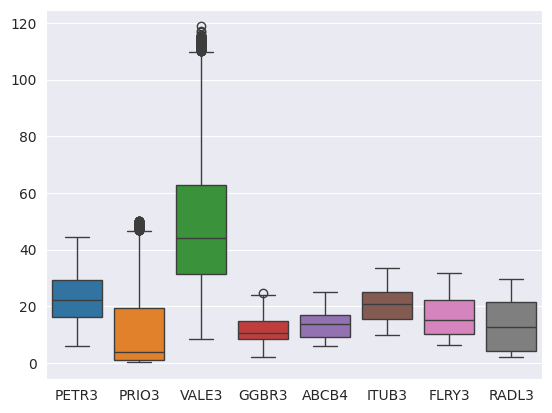

In [14]:
sns.boxplot(data=df_close.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1))

#### correlation

,PETR3,PRIO3,VALE3,GGBR3,ABCB4,ITUB3,FLRY3,RADL3
PETR3,1.000000,0.752591,0.764820,0.771377,0.654440,0.484722,0.329394,0.579472
PRIO3,0.752591,1.000000,0.683914,0.770788,0.407234,0.088885,0.003453,0.503017
VALE3,0.764820,0.683914,1.000000,0.917264,0.548766,0.453675,0.428262,0.708499
GGBR3,0.771377,0.770788,0.917264,1.000000,0.514714,0.306139,0.280163,0.628838
ABCB4,0.654440,0.407234,0.548766,0.514714,1.000000,0.857087,0.705357,0.812616
ITUB3,0.484722,0.088885,0.453675,0.306139,0.857087,1.000000,0.799866,0.729831
FLRY3,0.329394,0.003453,0.428262,0.280163,0.705357,0.799866,1.000000,0.666377
RADL3,0.579472,0.503017,0.708499,0.628838,0.812616,0.729831,0.666377,1.000000


None


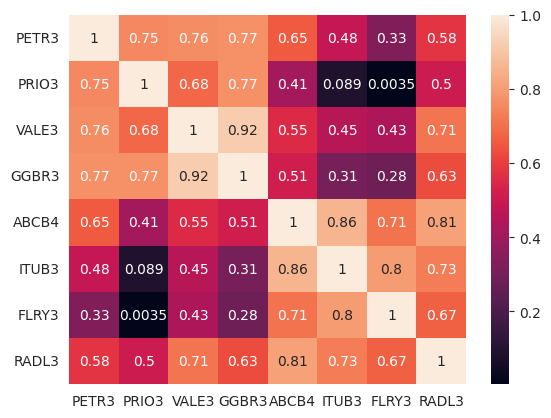

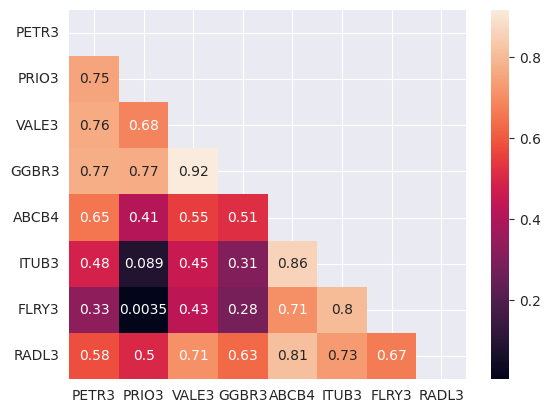

In [15]:
# close correlation
corr_mtrx_close = df_close.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1).corr()
print(display(corr_mtrx_close))

sns.heatmap(corr_mtrx_close, annot=True)
plt.show()


mask = np.triu(np.ones_like(corr_mtrx_close, dtype=bool))

sns.heatmap(corr_mtrx_close, annot=True, mask=mask)
plt.show()

### moving std and meta 

In [38]:
df_dp.reset_index(drop=False)['Date']

0      2010-12-22
1      2010-12-23
2      2010-12-24
3      2010-12-25
4      2010-12-26
          ...    
4813   2024-02-25
4814   2024-02-26
4815   2024-02-27
4816   2024-02-28
4817   2024-02-29
Name: Date, Length: 4818, dtype: datetime64[ns]

In [48]:
df_dp['month'] = df_dp.reset_index(drop=False)['Date'].dt.month.to_numpy()
df_dp['year'] = df_dp.reset_index(drop=False)['Date'].dt.year.to_numpy()
df_dp['day'] = df_dp.reset_index(drop=False)['Date'].dt.day.to_numpy()
df_dp['x'] = df_dp.apply(lambda x: f'{int(x.month)}-{int(x.day)}', axis = 1)
df_dp

,PETR3.SA,PRIO3.SA,VALE3.SA,GGBR3.SA,ABCB4.SA,ITUB3.SA,FLRY3.SA,RADL3.SA,month,year,day,x
Date,,,,,,,,,,,,
2010-12-22,0.848559,0.539196,0.739989,1.109263,-1.107384,0.694253,1.166778,-0.075831,12,2010,22,12-22
2010-12-23,0.877588,0.611895,0.532918,0.906196,-0.898499,0.449668,1.171521,-0.300757,12,2010,23,12-23
2010-12-24,0.877588,0.611895,0.532918,0.906196,-0.898499,0.449668,1.171521,-0.300757,12,2010,24,12-24
2010-12-25,0.877588,0.611895,0.532918,0.906196,-0.898499,0.449668,1.171521,-0.300757,12,2010,25,12-25
2010-12-26,0.877588,0.611895,0.532918,0.906196,-0.898499,0.449668,1.171521,-0.300757,12,2010,26,12-26
...,...,...,...,...,...,...,...,...,...,...,...,...
2024-02-25,0.727751,0.920320,0.115310,0.105989,0.770039,0.697232,-1.400571,1.301530,2,2024,25,2-25
2024-02-26,1.229304,0.900798,-1.056026,-0.386233,0.701608,0.596515,-1.140905,1.897895,2,2024,26,2-26
2024-02-27,1.064163,0.574021,0.407318,0.751218,1.110699,0.898616,0.467179,1.740712,2,2024,27,2-27


<Axes: xlabel='x', ylabel='PETR3.SA'>

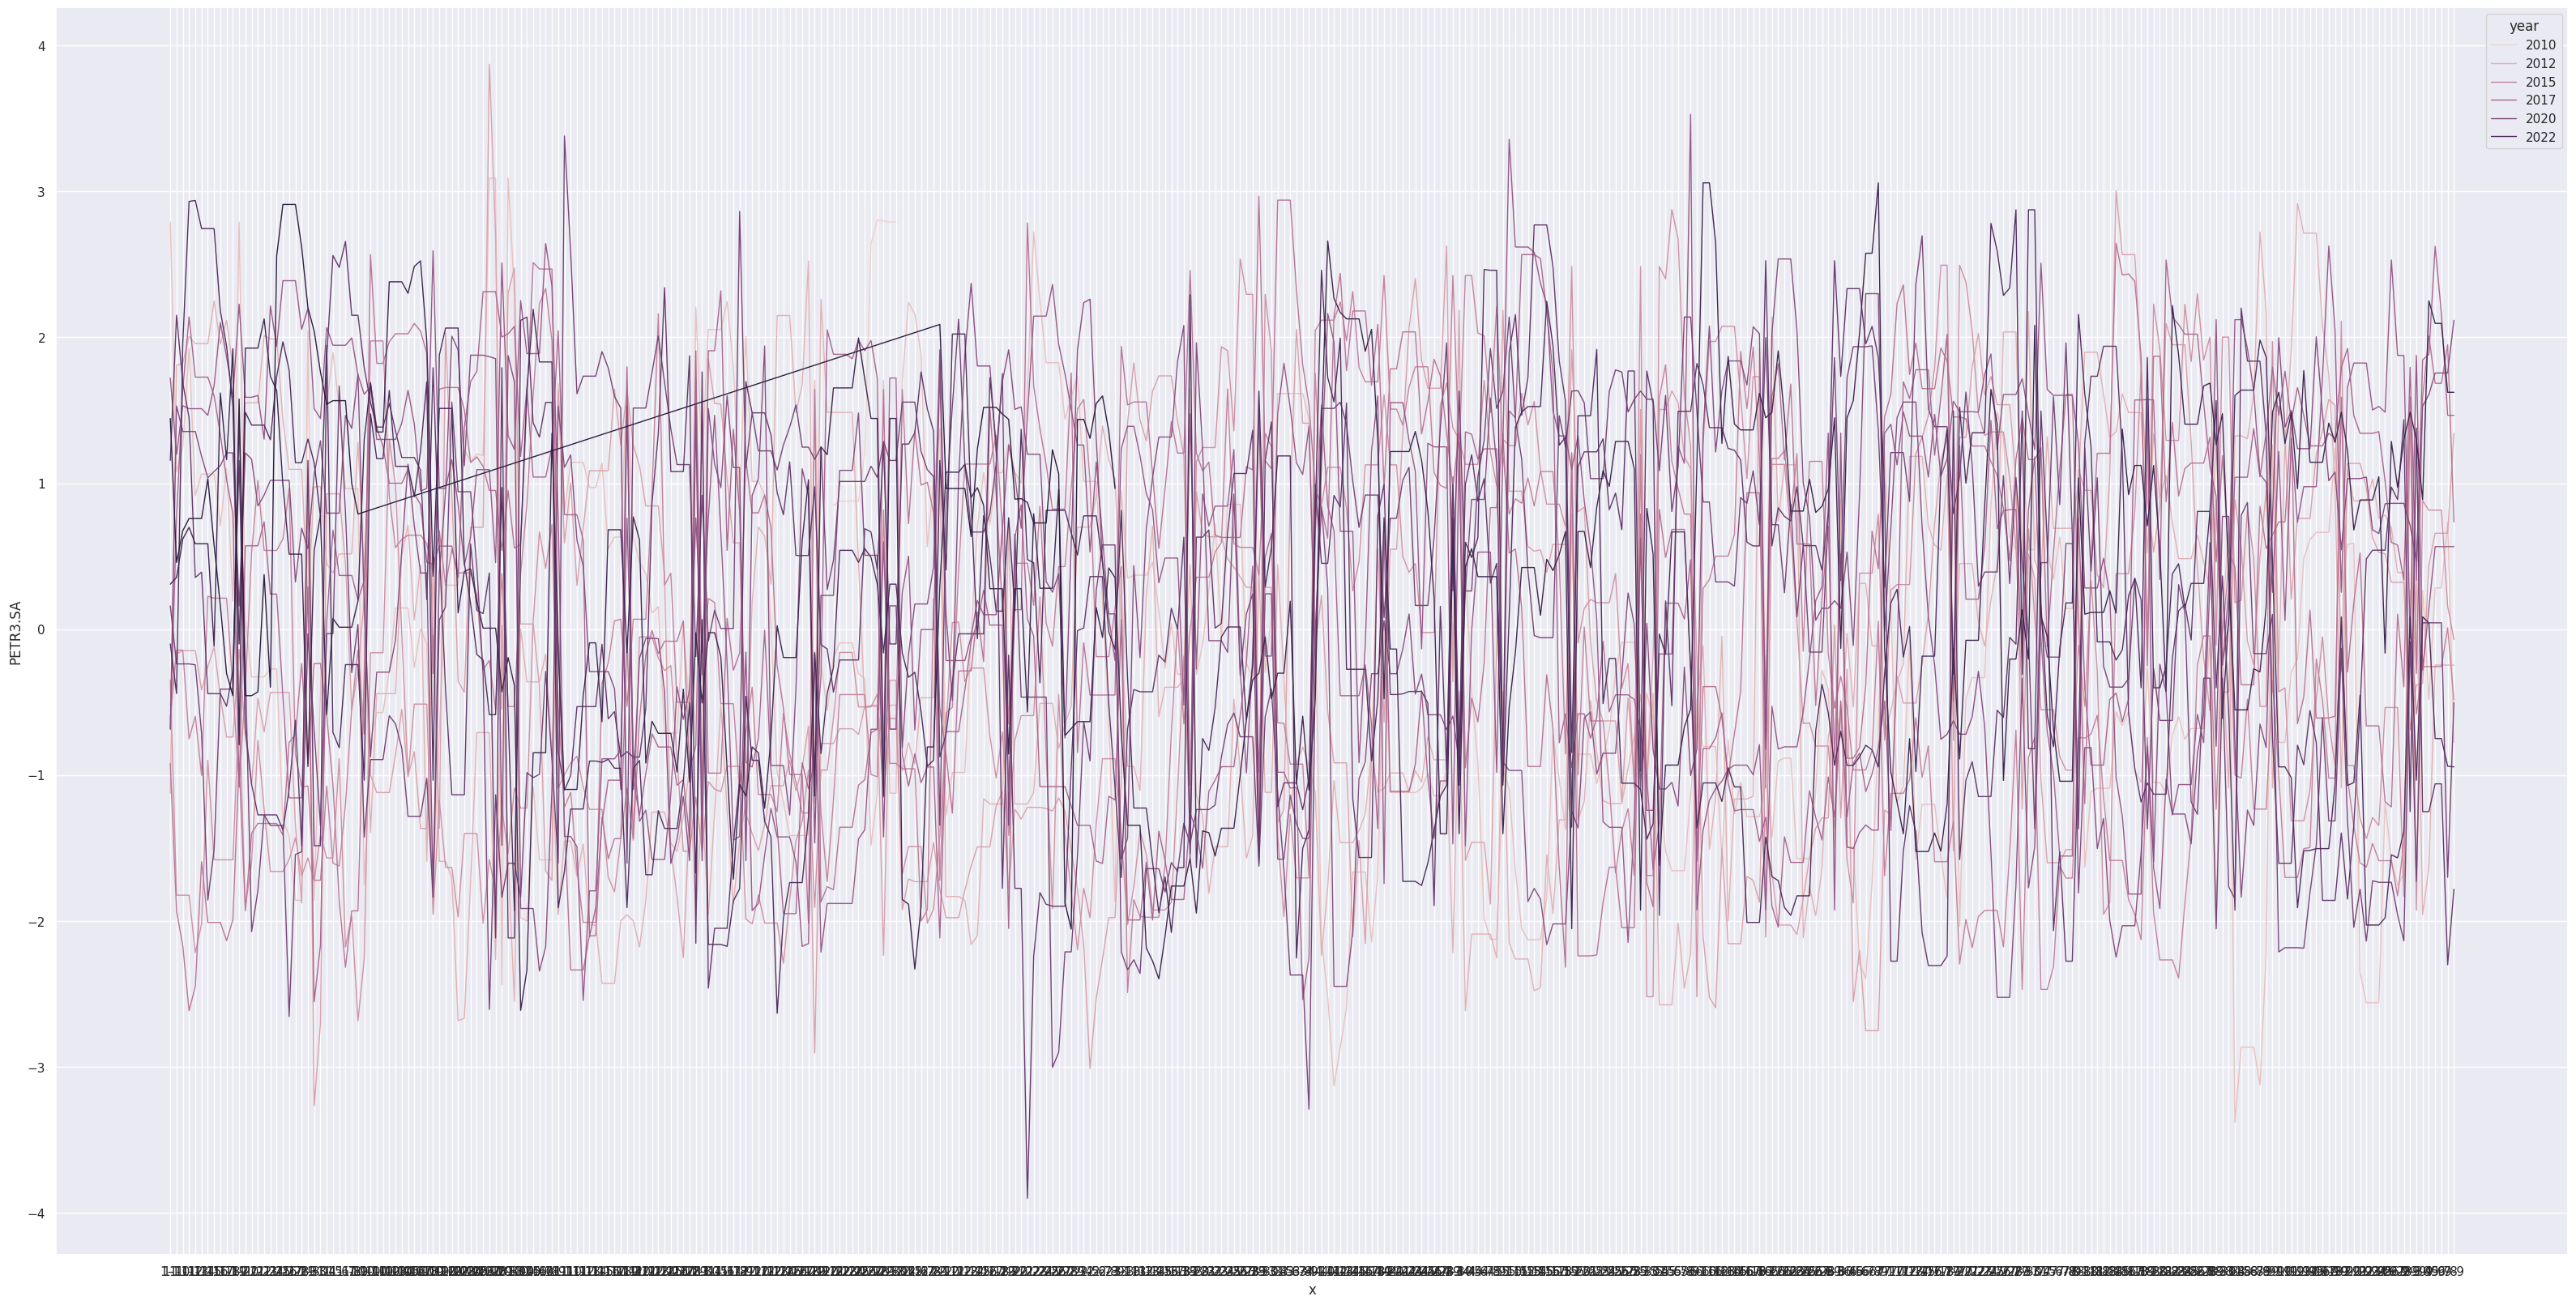

In [55]:
sns.set_theme(rc={'figure.figsize':(40,20)})
sns.lineplot(
    data=df_dp.sort_values('x'), 
    x="x", 
    y="PETR3.SA",
    hue = "year", 
    lw=1,
    
    )

#### Describe

In [16]:
df_dp.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1).describe()

,PETR3,PRIO3,VALE3,GGBR3,ABCB4,ITUB3,FLRY3,RADL3
count,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000
mean,0.072853,0.082749,0.012275,0.032309,0.085402,0.120431,-0.010396,0.186332
std,1.316939,1.353250,1.294722,1.297827,1.307334,1.313760,1.285413,1.288326
min,-3.901364,-3.483726,-3.628286,-3.581146,-3.283496,-3.563854,-3.724003,-3.522259
25%,-1.027328,-1.012037,-1.035961,-1.029149,-0.996601,-0.986374,-1.045334,-0.856735
50%,0.067887,0.081516,-0.002204,0.031756,0.086235,0.239954,-0.050400,0.324774
75%,1.161929,1.149161,1.034024,1.107855,1.136012,1.210616,1.015183,1.239388
max,3.872128,4.149822,3.722931,3.739784,3.494172,3.648107,3.613129,3.534116


In [17]:
print(df_dp.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1).describe().round(2).to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrrr}
\toprule
 & PETR3 & PRIO3 & VALE3 & GGBR3 & ABCB4 & ITUB3 & FLRY3 & RADL3 \\
\midrule
count & 4818.00 & 4818.00 & 4818.00 & 4818.00 & 4818.00 & 4818.00 & 4818.00 & 4818.00 \\
mean & 0.07 & 0.08 & 0.01 & 0.03 & 0.09 & 0.12 & -0.01 & 0.19 \\
std & 1.32 & 1.35 & 1.29 & 1.30 & 1.31 & 1.31 & 1.29 & 1.29 \\
min & -3.90 & -3.48 & -3.63 & -3.58 & -3.28 & -3.56 & -3.72 & -3.52 \\
25% & -1.03 & -1.01 & -1.04 & -1.03 & -1.00 & -0.99 & -1.05 & -0.86 \\
50% & 0.07 & 0.08 & -0.00 & 0.03 & 0.09 & 0.24 & -0.05 & 0.32 \\
75% & 1.16 & 1.15 & 1.03 & 1.11 & 1.14 & 1.21 & 1.02 & 1.24 \\
max & 3.87 & 4.15 & 3.72 & 3.74 & 3.49 & 3.65 & 3.61 & 3.53 \\
\bottomrule
\end{tabular}



In [18]:
df_dp_int.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1).describe()

,PETR3,PRIO3,VALE3,GGBR3,ABCB4,ITUB3,FLRY3,RADL3
count,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000,4818.000000
mean,0.057908,0.062267,0.007472,0.022001,0.070154,0.067455,-0.001038,0.106268
std,0.954089,0.996081,0.942804,0.938604,0.947697,0.951718,0.917502,0.927247
min,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000,-3.000000
25%,-1.000000,-1.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000


In [19]:
print(df_dp_int.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1).describe().round(2).to_latex(float_format="%.2f"))

\begin{tabular}{lrrrrrrrr}
\toprule
 & PETR3 & PRIO3 & VALE3 & GGBR3 & ABCB4 & ITUB3 & FLRY3 & RADL3 \\
\midrule
count & 4818.00 & 4818.00 & 4818.00 & 4818.00 & 4818.00 & 4818.00 & 4818.00 & 4818.00 \\
mean & 0.06 & 0.06 & 0.01 & 0.02 & 0.07 & 0.07 & -0.00 & 0.11 \\
std & 0.95 & 1.00 & 0.94 & 0.94 & 0.95 & 0.95 & 0.92 & 0.93 \\
min & -3.00 & -3.00 & -3.00 & -3.00 & -3.00 & -3.00 & -3.00 & -3.00 \\
25% & -1.00 & -1.00 & -1.00 & -1.00 & 0.00 & 0.00 & -1.00 & 0.00 \\
50% & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 & 0.00 \\
75% & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 & 1.00 \\
max & 3.00 & 4.00 & 3.00 & 3.00 & 3.00 & 3.00 & 3.00 & 3.00 \\
\bottomrule
\end{tabular}



<Axes: >

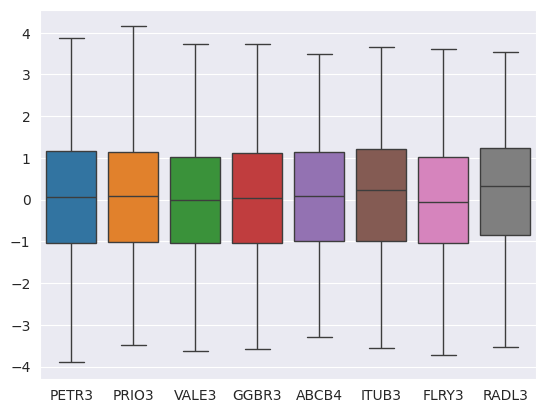

In [20]:
sns.boxplot(data=df_dp.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1))

<Axes: >

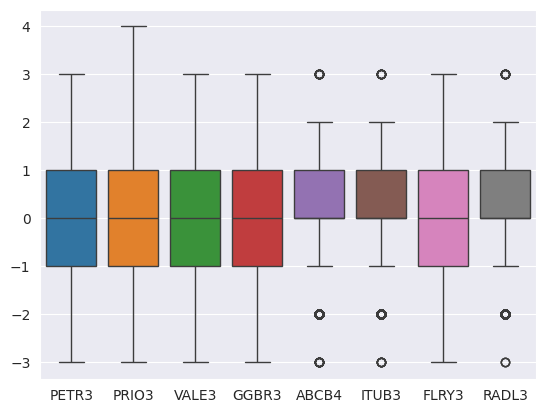

In [21]:
sns.boxplot(data=df_dp_int.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1))

#### Correlation

,PETR3,PRIO3,VALE3,GGBR3,ABCB4,ITUB3,FLRY3,RADL3
PETR3,1.000000,0.299106,0.363926,0.382302,0.332698,0.499145,0.185479,0.117924
PRIO3,0.299106,1.000000,0.300556,0.237050,0.177052,0.130420,0.122142,0.040903
VALE3,0.363926,0.300556,1.000000,0.582309,0.171576,0.241367,0.125103,0.096279
GGBR3,0.382302,0.237050,0.582309,1.000000,0.334522,0.368253,0.231238,0.104298
ABCB4,0.332698,0.177052,0.171576,0.334522,1.000000,0.585860,0.246072,0.197841
ITUB3,0.499145,0.130420,0.241367,0.368253,0.585860,1.000000,0.275842,0.254245
FLRY3,0.185479,0.122142,0.125103,0.231238,0.246072,0.275842,1.000000,0.315681
RADL3,0.117924,0.040903,0.096279,0.104298,0.197841,0.254245,0.315681,1.000000


None


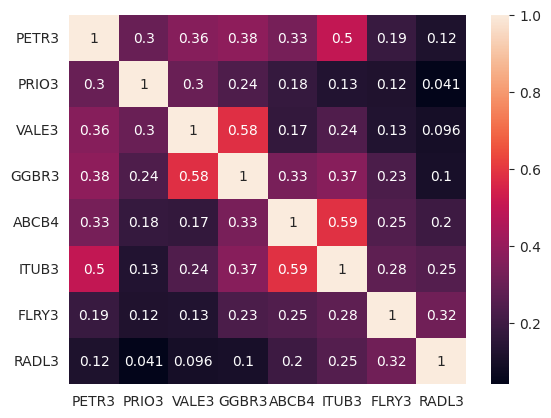

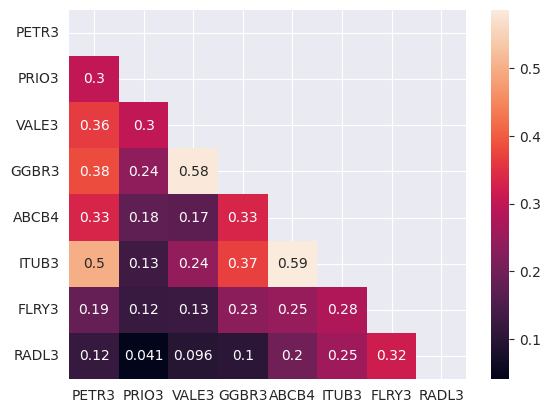

In [22]:
# close correlation
corr_mtrx_close = df_dp.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1).corr()
print(display(corr_mtrx_close))

sns.heatmap(corr_mtrx_close, annot=True)
plt.show()


mask = np.triu(np.ones_like(corr_mtrx_close, dtype=bool))

sns.heatmap(corr_mtrx_close, annot=True, mask=mask)
plt.show()

,PETR3,PRIO3,VALE3,GGBR3,ABCB4,ITUB3,FLRY3,RADL3
PETR3,1.000000,0.260304,0.351932,0.353726,0.305461,0.438089,0.139752,0.099578
PRIO3,0.260304,1.000000,0.263890,0.206149,0.165148,0.104624,0.113648,0.036439
VALE3,0.351932,0.263890,1.000000,0.512874,0.153458,0.231264,0.105365,0.082681
GGBR3,0.353726,0.206149,0.512874,1.000000,0.280893,0.319977,0.184441,0.093203
ABCB4,0.305461,0.165148,0.153458,0.280893,1.000000,0.514242,0.240507,0.182399
ITUB3,0.438089,0.104624,0.231264,0.319977,0.514242,1.000000,0.224272,0.216534
FLRY3,0.139752,0.113648,0.105365,0.184441,0.240507,0.224272,1.000000,0.274161
RADL3,0.099578,0.036439,0.082681,0.093203,0.182399,0.216534,0.274161,1.000000


None


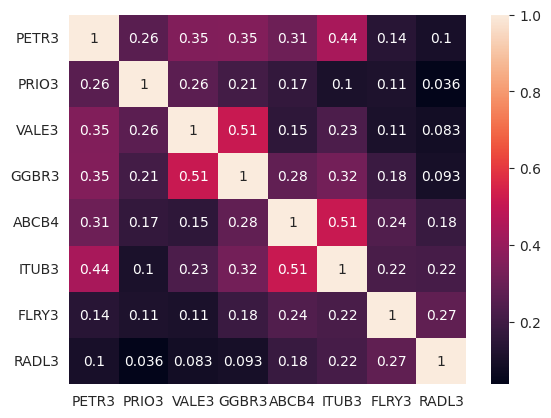

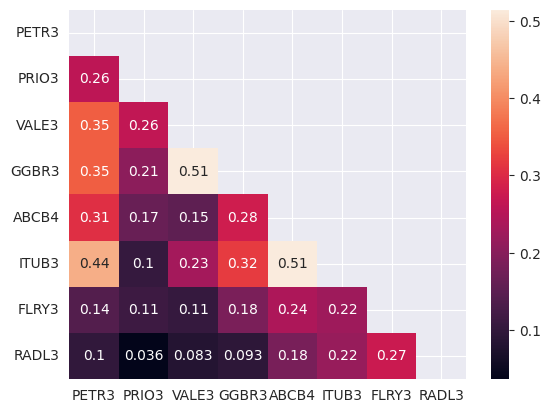

In [23]:
# close correlation
corr_mtrx_close = df_dp_int.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1).corr()
print(display(corr_mtrx_close))

sns.heatmap(corr_mtrx_close, annot=True)
plt.show()


mask = np.triu(np.ones_like(corr_mtrx_close, dtype=bool))

sns.heatmap(corr_mtrx_close, annot=True, mask=mask)
plt.show()

#### Decompose

In [24]:
!pip install statsmodels

In [25]:
df_dp

,PETR3.SA,PRIO3.SA,VALE3.SA,GGBR3.SA,ABCB4.SA,ITUB3.SA,FLRY3.SA,RADL3.SA
Date,,,,,,,,
2010-12-22,0.848559,0.539196,0.739989,1.109263,-1.107384,0.694253,1.166778,-0.075831
2010-12-23,0.877588,0.611895,0.532918,0.906196,-0.898499,0.449668,1.171521,-0.300757
2010-12-24,0.877588,0.611895,0.532918,0.906196,-0.898499,0.449668,1.171521,-0.300757
2010-12-25,0.877588,0.611895,0.532918,0.906196,-0.898499,0.449668,1.171521,-0.300757
2010-12-26,0.877588,0.611895,0.532918,0.906196,-0.898499,0.449668,1.171521,-0.300757
...,...,...,...,...,...,...,...,...
2024-02-25,0.727751,0.920320,0.115310,0.105989,0.770039,0.697232,-1.400571,1.301530
2024-02-26,1.229304,0.900798,-1.056026,-0.386233,0.701608,0.596515,-1.140905,1.897895
2024-02-27,1.064163,0.574021,0.407318,0.751218,1.110699,0.898616,0.467179,1.740712


In [26]:
# Resample para frequência mensal (caso os dados não sejam diários, ajuste conforme necessário)
df_resampled = df_dp.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1).resample('M').mean()
df_resampled

/tmp/ipykernel_207206/387925839.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_resampled = df_dp.rename({col:col.replace(".SA", "") for col in df_dp.columns},axis=1).resample('M').mean()


,PETR3,PRIO3,VALE3,GGBR3,ABCB4,ITUB3,FLRY3,RADL3
Date,,,,,,,,
2010-12-31,1.659038,0.530415,-0.269342,0.570465,-0.769511,0.478651,1.386741,-0.986905
2011-01-31,0.503879,1.160728,0.680573,0.292706,-0.432075,-0.045475,0.232090,-1.621039
2011-02-28,0.752881,0.469470,-0.931772,0.155466,-0.801265,-0.205911,-1.286239,-0.478815
2011-03-31,0.549277,0.872464,-1.014562,-1.041893,-0.935875,0.220797,-0.018726,0.544894
2011-04-30,-1.365801,-1.149819,-0.563757,-0.991497,1.254980,0.808724,-0.646330,-0.654711
...,...,...,...,...,...,...,...,...
2023-10-31,0.676717,0.078699,-0.636594,-1.410637,-0.825529,0.195607,0.384110,-0.285579
2023-11-30,-0.404048,-0.557037,1.339749,0.862732,1.380022,1.590075,1.315434,0.617149
2023-12-31,0.095300,-0.328597,0.749779,0.281995,1.575150,1.524936,1.422049,0.777708


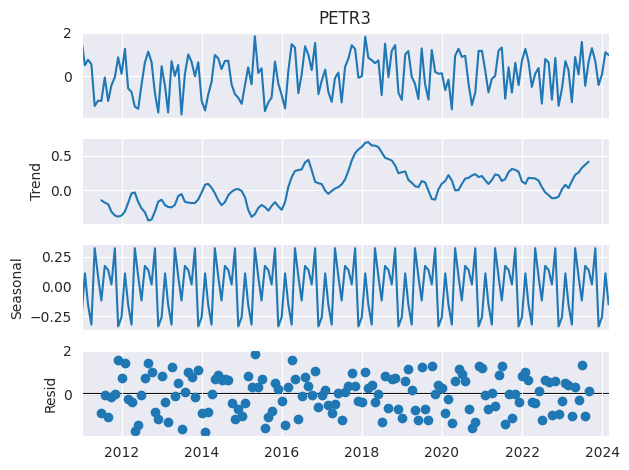

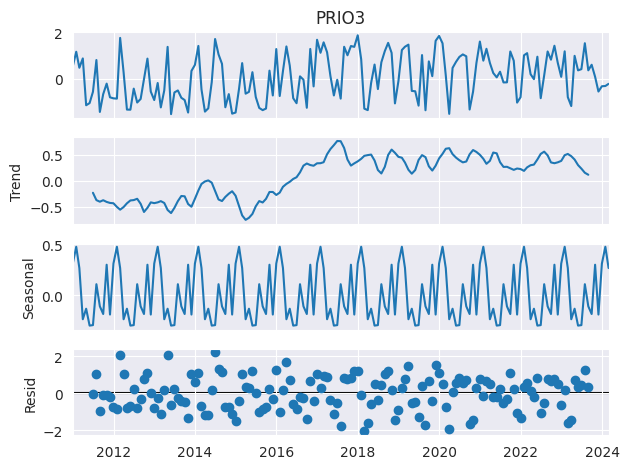

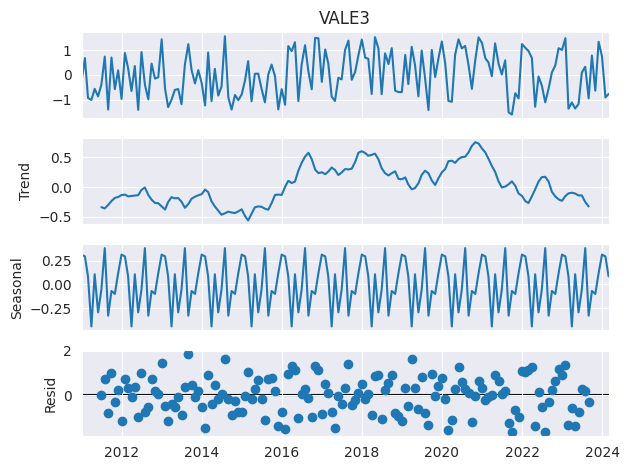

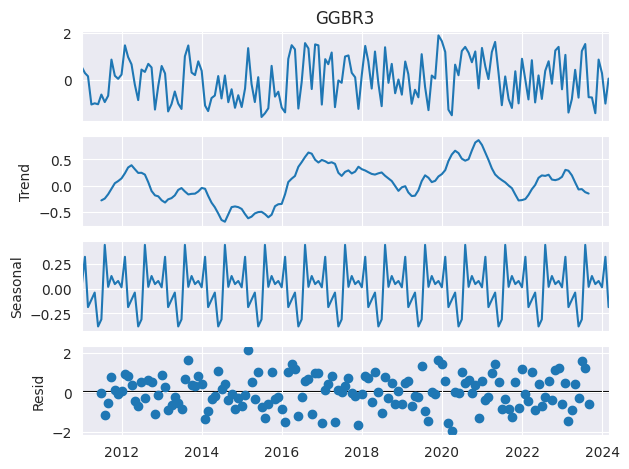

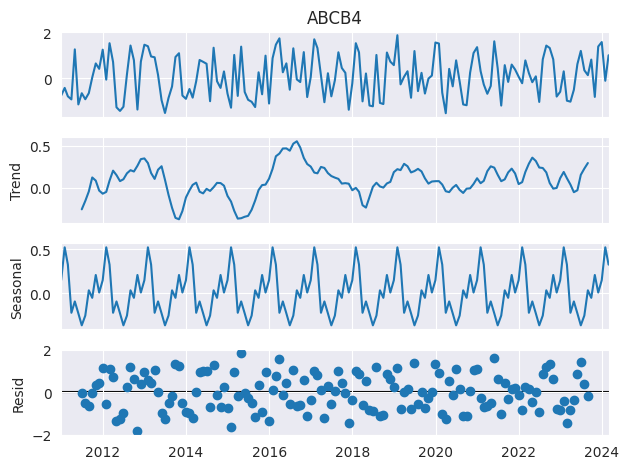

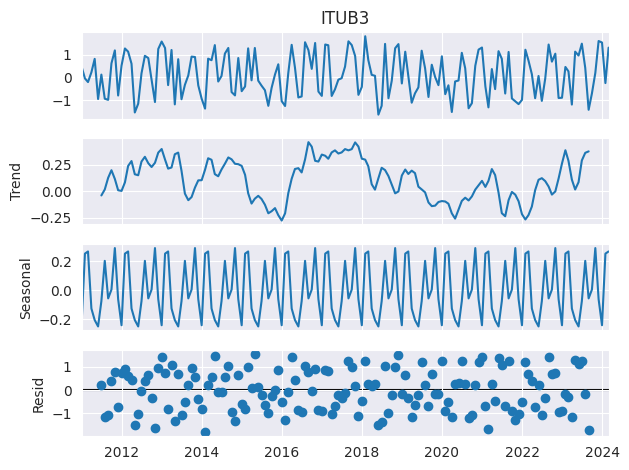

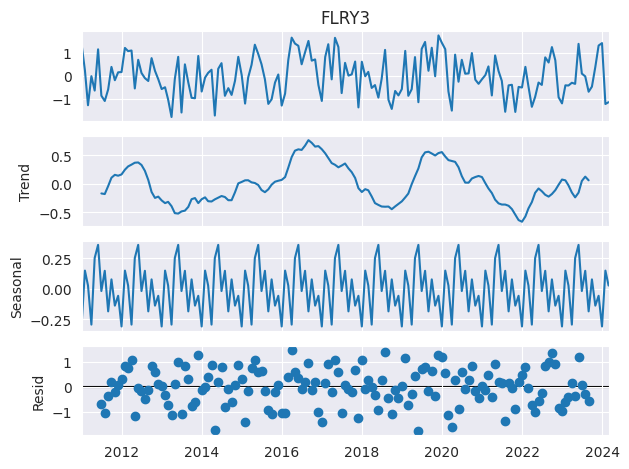

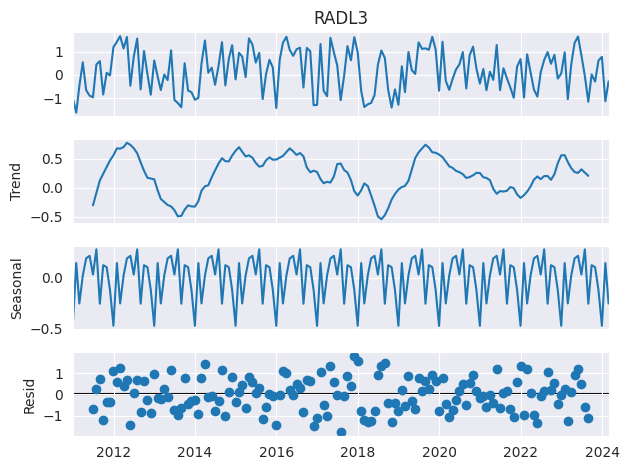

In [28]:
for asset in list_assets:

    # Decomposição sazonal com período anual (12 meses)
    result = seasonal_decompose(df_resampled[asset.replace(".SA", "")], model='additive', period=12)

    # Plotar os componentes da decomposição
    result.plot()
    plt.show()